# Pests Identification By Robots in Agriculture
## Final Project
## By: Archit Jain

Mounting Drive at Google Colab so that dataset can be accessed

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !unzip '/content/drive/MyDrive/archive.zip' -d '/content/drive/MyDrive/PestsDataset/' #Unzip the dataset (Needs to be run only once then comment it)

In [3]:
#Importing libraries
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras import optimizers

In [4]:
#Creating list of files in each subdirectory of the Dataset
fruitmothdatalist=os.listdir(f'/content/drive/MyDrive/PestsDataset/Fruit.Piercing.Moth')
gallfliesdatalist = os.listdir(f'/content/drive/MyDrive/PestsDataset/Gall.Flies')
locustdatalist = os.listdir(f'/content/drive/MyDrive/PestsDataset/Locust')
stemborerdatalist = os.listdir(f'/content/drive/MyDrive/PestsDataset/Stem.Borer')

In [5]:
#Creating lists of filenames, categories and their path that will be later merged into a dataframe
filenames = fruitmothdatalist + gallfliesdatalist + locustdatalist + stemborerdatalist
categories = []
filepath = []
for x in fruitmothdatalist:
  categories.append('Fruit Piercing Moth')
  path = '/content/drive/MyDrive/PestsDataset/Fruit.Piercing.Moth/' + x 
  filepath.append(path)
for x in gallfliesdatalist:
  categories.append('Gall Flies')
  path = '/content/drive/MyDrive/PestsDataset/Gall.Flies/' + x
  filepath.append(path)
for x in locustdatalist:
  categories.append('Locust')
  path = '/content/drive/MyDrive/PestsDataset/Locust/' + x
  filepath.append(path)
for x in stemborerdatalist:
  categories.append('Stem Borer')
  path = '/content/drive/MyDrive/PestsDataset/Stem.Borer/' + x
  filepath.append(path)

In [6]:
# Creating the Dataframe
df = pd.DataFrame({
        'filename': filenames,
        'category': categories,
        'filepath': filepath
     })

In [7]:
df.head()

,filename,category,filepath
0,FruitMothImage146.jpeg,Fruit Piercing Moth,/content/drive/MyDrive/PestsDataset/Fruit.Pier...
1,FruitMothImage242.jpeg,Fruit Piercing Moth,/content/drive/MyDrive/PestsDataset/Fruit.Pier...
2,FruitMothImage145.jpeg,Fruit Piercing Moth,/content/drive/MyDrive/PestsDataset/Fruit.Pier...
3,FruitMothImage19.jpeg,Fruit Piercing Moth,/content/drive/MyDrive/PestsDataset/Fruit.Pier...
4,FruitMothImage275.jpeg,Fruit Piercing Moth,/content/drive/MyDrive/PestsDataset/Fruit.Pier...


In [8]:
#Setting target tize of images to be input into the model
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size_gen = 32

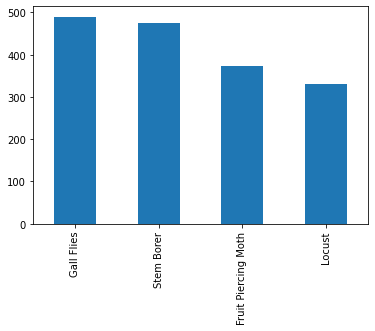

In [9]:
#Exploring total amount of data for each category
df['category'].value_counts().plot.bar()

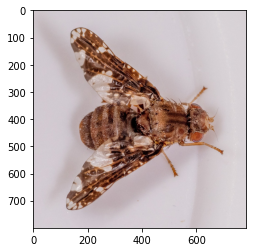

In [10]:
#Previwing a random image
sample = random.choice(filepath)
image = load_img(sample)
plt.imshow(image)

## Splitting Data into Train and test with 80% in train

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
total_train = train.shape[0]
total_val = test.shape[0]

In [12]:
#Creating Image Data Generator for Training Data so that data set is larger
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

In [13]:
train_gen = datagen.flow_from_dataframe(train,
                                        directory = None,
                                        x_col = 'filepath',
                                        y_col = 'category',
                                        target_size = IMAGE_SIZE,
                                        batch_size = batch_size_gen)

Found 1335 validated image filenames belonging to 4 classes.


In [14]:
#Creating Image Data Generator for Testing + Rescale Image value by 255.
datagen_test = ImageDataGenerator(rescale=1./255)

In [15]:
test_gen = datagen_test.flow_from_dataframe(test,
                                            directory = None,
                                            x_col = 'filepath',
                                            y_col = 'category',
                                            target_size = IMAGE_SIZE,
                                            batch_size = batch_size_gen)

Found 334 validated image filenames belonging to 4 classes.


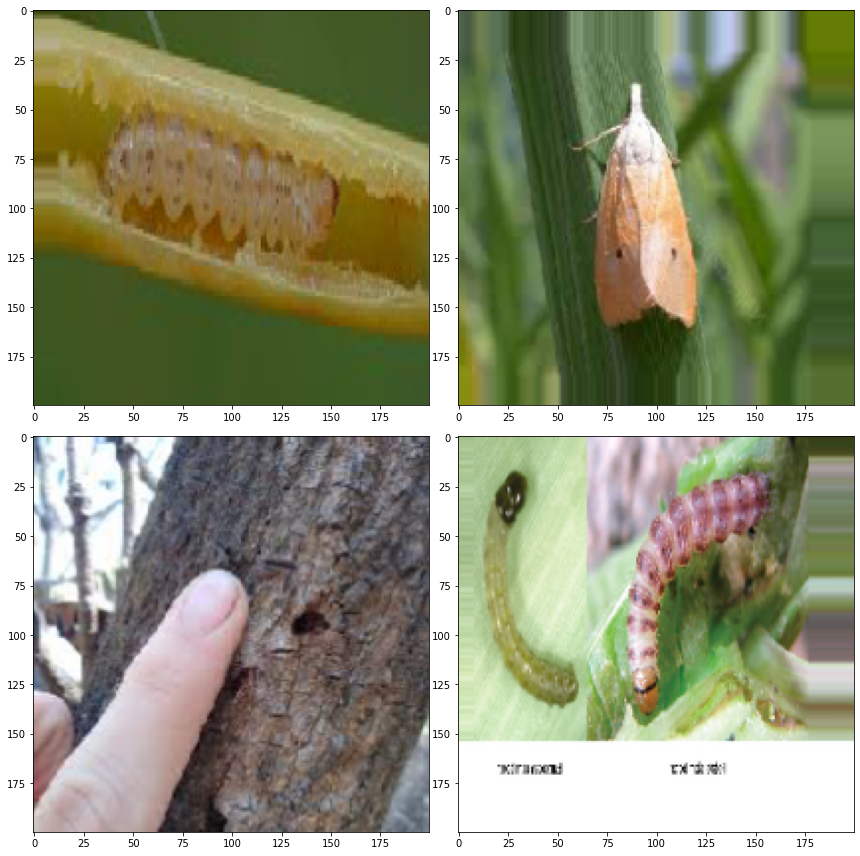

In [16]:
# View 4 Images generated from Image Generator
plt.figure(figsize=(12, 12))
for i in range(4):
  plt.subplot(2,2, i+1)
  for X_batch, Y_batch in train_gen:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

## Model 1 - Training Convulational Neural Network from Scratch

In [17]:
#Creating Model
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile( loss='categorical_crossentropy', 
              optimizer = optimizers.Adam(learning_rate=0.0005, 
                                          beta_1=0.85, beta_2=0.95, 
                                          epsilon=1e-05), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

In [18]:
# Create Checkpointer to periodically save the model once validation_accuracy increases
path_to_model="/content/drive/MyDrive/Model"
path_to_logs = "/content/drive/MyDrive/Logs"
checkpointer_new = keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/CNN_200_Image_Size_Test_Scaled_Hyperparameters2.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [19]:
#Training the model
history = model.fit(train_gen, 
          epochs=100, 
          validation_data = test_gen, 
          steps_per_epoch = total_train/batch_size_gen, 
          validation_steps = total_val/batch_size_gen,
          callbacks=[checkpointer_new]
          )

Epoch 1/100
41/41 [==============================] - 474s 10s/step - loss: 1.3832 - accuracy: 0.2809 - val_loss: 1.3530 - val_accuracy: 0.2934

Epoch 00001: val_accuracy improved from -inf to 0.29341, saving model to /content/drive/MyDrive/Model/CNN_200_Image_Size_Test_Scaled_Hyperparameters2.h5
Epoch 2/100
41/41 [==============================] - 20s 482ms/step - loss: 1.3295 - accuracy: 0.2993 - val_loss: 1.2660 - val_accuracy: 0.4311

Epoch 00002: val_accuracy improved from 0.29341 to 0.43114, saving model to /content/drive/MyDrive/Model/CNN_200_Image_Size_Test_Scaled_Hyperparameters2.h5
Epoch 3/100
41/41 [==============================] - 19s 463ms/step - loss: 1.2896 - accuracy: 0.3626 - val_loss: 1.2396 - val_accuracy: 0.3892

Epoch 00003: val_accuracy did not improve from 0.43114
Epoch 4/100
41/41 [==============================] - 20s 474ms/step - loss: 1.2668 - accuracy: 0.3764 - val_loss: 1.2492 - val_accuracy: 0.4042

Epoch 00004: val_accuracy did not improve from 0.43114
Ep

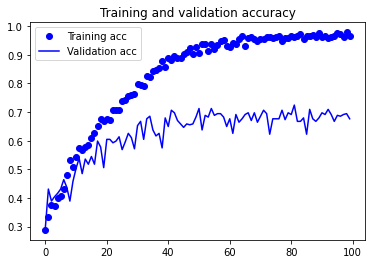

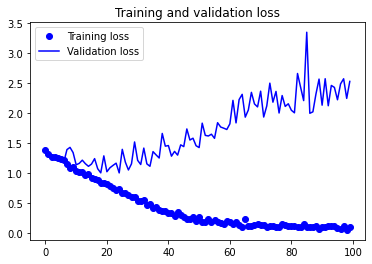

In [20]:
# Plotting the training validation accuracy and losses
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Manual Test of the model 1 on 4 random pictures from google

In [49]:
#Loading the model saved previously
modelpath = "/content/drive/MyDrive/Model/CNN_200_Image_Size_Test_Scaled_Hyperparameters2.h5"
model = keras.models.load_model(modelpath)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

In [50]:
# To get the keys we print it and copy and then save it in a list
print(test_gen.class_indices.keys())

#Load pics saved in google drive for testing purposes and converting them to tensors

manual_val_pics = os.listdir(f'/content/drive/MyDrive/PestsTest') #Contains Pics downloaded from google
pics=[]
ans = []
for pic in manual_val_pics:
  path = '/content/drive/MyDrive/PestsTest/' + pic
  # print(path)
  pics.append(tf.keras.preprocessing.image.load_img(
    path, color_mode="rgb", target_size=(200, 200), interpolation="nearest"))
  ans.append(pic)


dict_keys(['Fruit Piercing Moth', 'Gall Flies', 'Locust', 'Stem Borer'])


In [51]:
# Rescale images
pic_arrays=[]
for pic in pics:
  pic_arrays.append((tf.keras.preprocessing.image.img_to_array(pic, data_format=None, dtype=None)/255))

In [52]:
#Generate predictions by the model
predictions=[]
for pic in pic_arrays:
  img = np.expand_dims(pic, axis=0)
  predictions.append(model.predict(img))

In [53]:
predictions

[array([[0.00297092, 0.99989605, 0.00124843, 0.0267897 ]], dtype=float32),
 array([[9.1144294e-01, 1.4947267e-07, 9.9999964e-01, 2.5991473e-02]],
       dtype=float32),
 array([[9.9999988e-01, 2.1507560e-05, 1.0478322e-03, 5.4504246e-02]],
       dtype=float32),
 array([[1.6330934e-01, 1.3842061e-02, 3.2236636e-05, 9.9969852e-01]],
       dtype=float32),
 array([[0.06437701, 0.02969469, 0.9999759 , 0.00101222]], dtype=float32),
 array([[0.7815858, 0.0013163, 0.8916559, 0.8605774]], dtype=float32),
 array([[9.9996698e-01, 2.7641561e-05, 8.4084821e-01, 5.3196743e-02]],
       dtype=float32),
 array([[3.1678805e-01, 9.9997461e-01, 1.8077591e-05, 5.3958823e-03]],
       dtype=float32)]

In [54]:
key2 = ['Fruit Piercing Moth', 'Gall Flies', 'Locust', 'Stem Borer']
# As per the predictions obtaing what category they should belong to and converting it to text
#compare results to to the file name
for i in range(4):
  print(key2[np.argmax(predictions[i][0])] + ' should be ' + ans[i].split('.')[0])


Gall Flies should be GallFly
Locust should be Locust
Fruit Piercing Moth should be FruitPiercingMoth
Stem Borer should be StemBorer


# Activation Maps

In [59]:
# selecting a random image from the dataset
img_path = random.choice(filepath)

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(200, 200))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 200, 200, 3)
print(img_tensor.shape)

(1, 200, 200, 3)


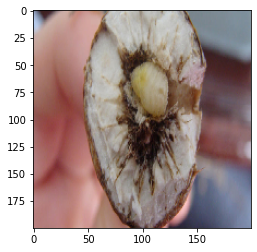

In [60]:
plt.imshow(img_tensor[0])
plt.show()

In [61]:
from keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


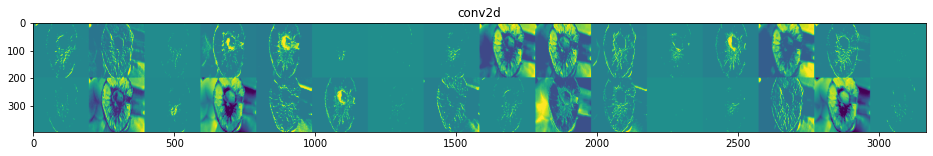

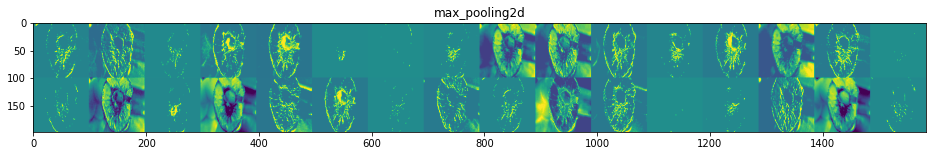

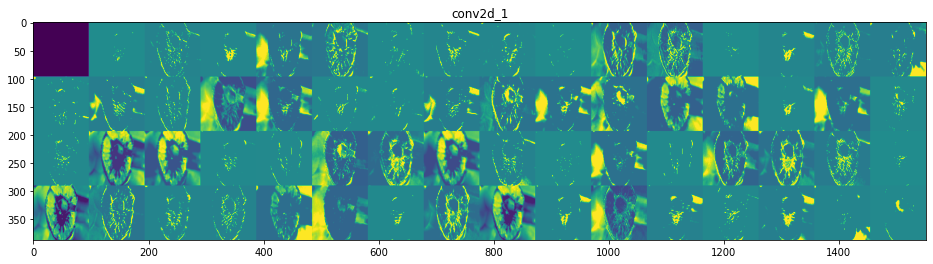

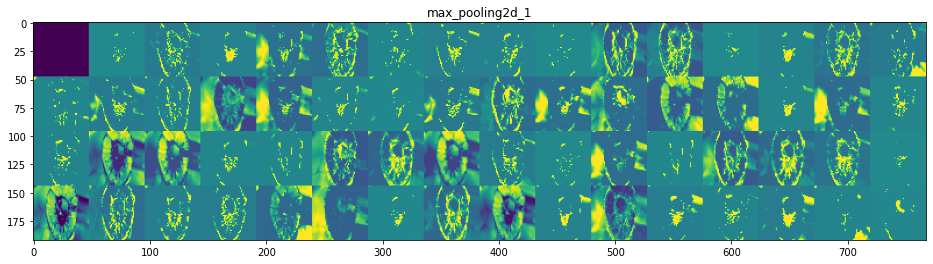

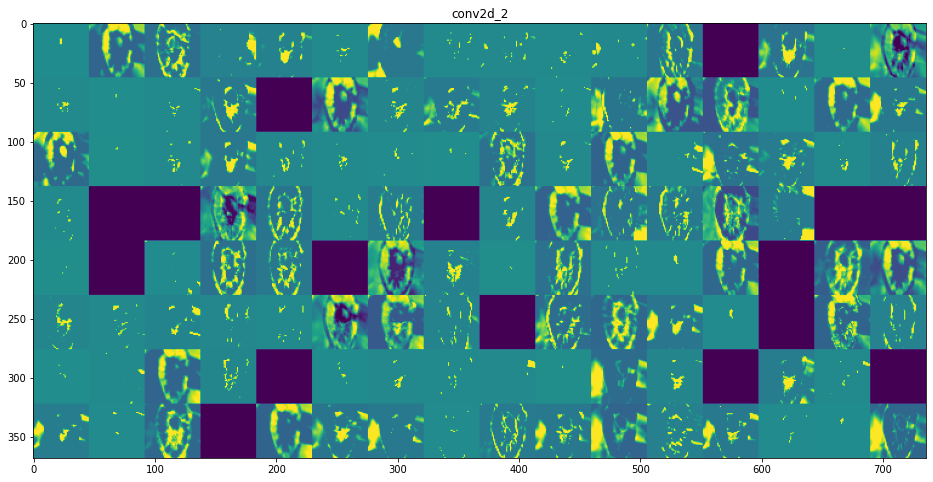

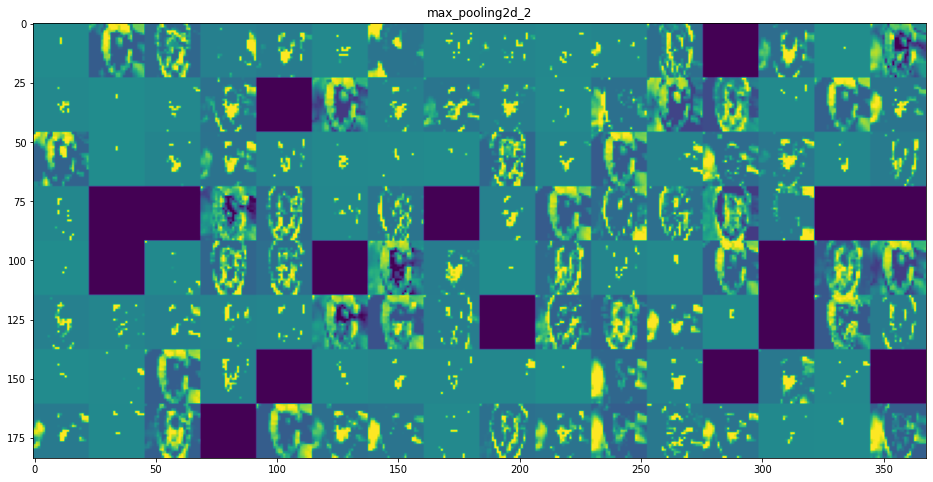

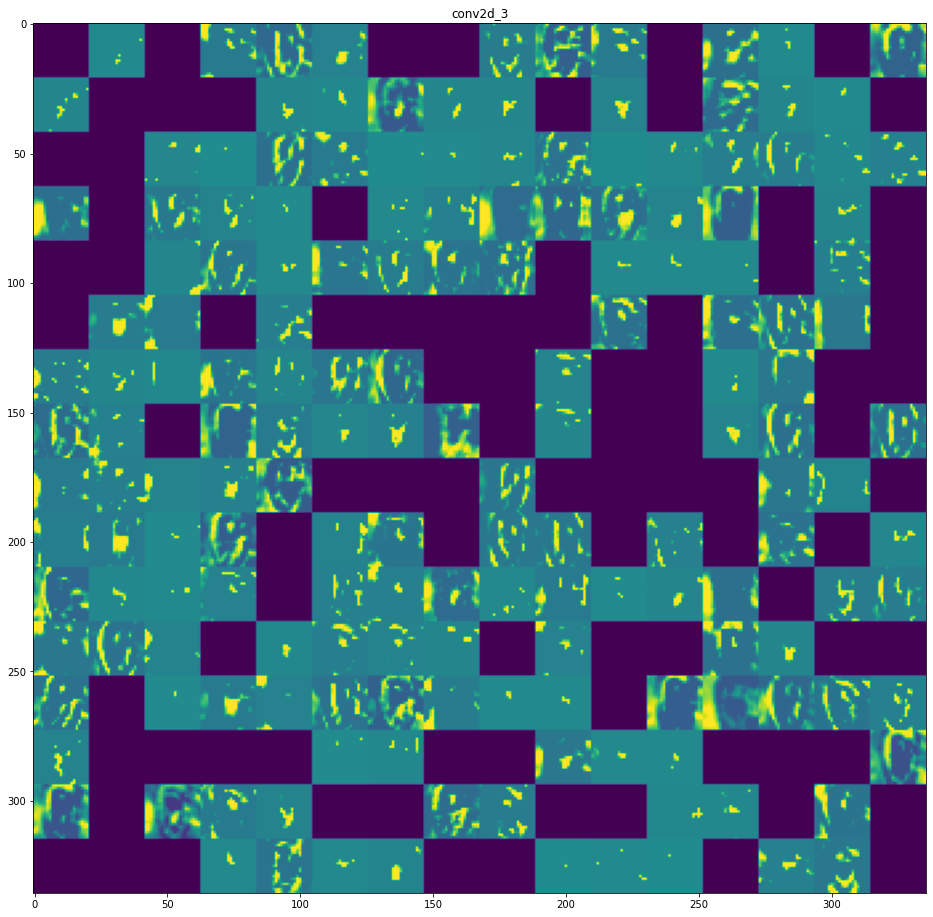

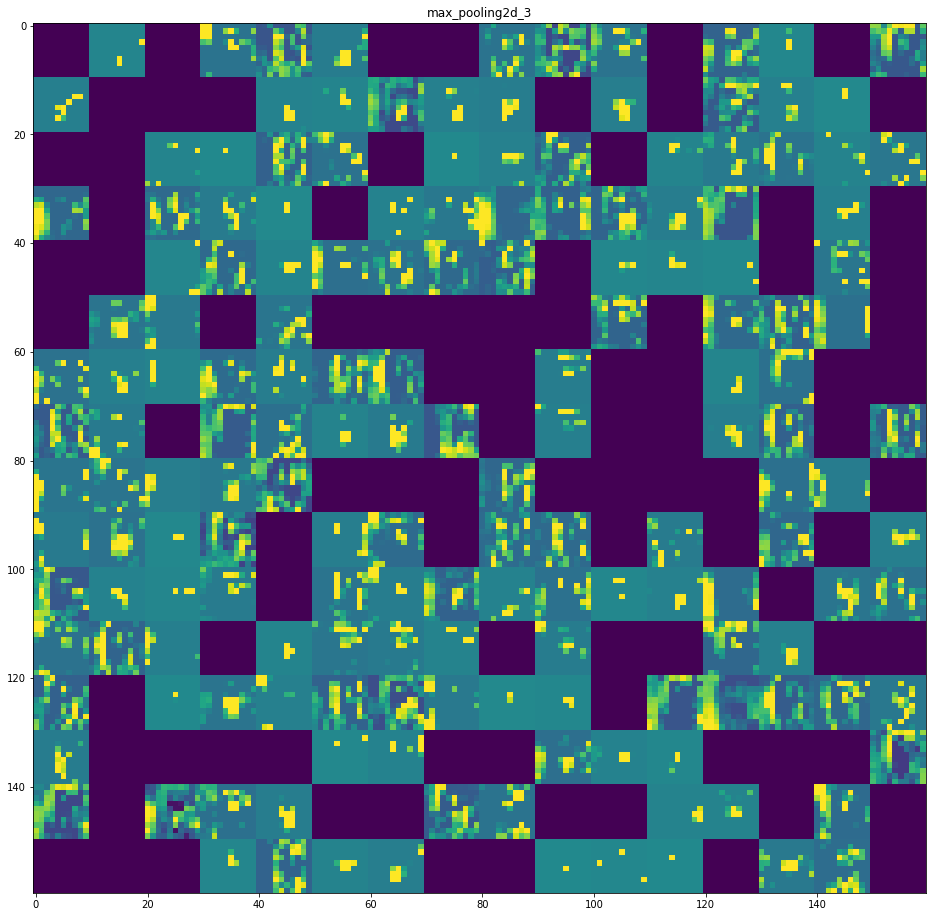

In [62]:
activations = activation_model.predict(img_tensor)
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# Model 2 Using Pre-Trained Layers from Xception Model trained on Imagenet

In [31]:
# Loading Pre-trained model Xception after it was trained on Imagenet Dataset and setting input shape to 200, 200, 3
pre_tr_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(200, 200, 3)
    )

pre_tr_model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
__________________________

In [32]:
#Setting the pre_trained model so that it weights will not change during training without top layer
pre_tr_model.trainable=False

In [33]:
#Creating a new model with the first layer being the pre-trained model
model = models.Sequential()
model.add(pre_tr_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='selu'))
model.add(layers.Dense(128, activation='selu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [34]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
#used default hyperparameters for adam optimizer

In [36]:
history = model.fit(train_gen, 
          epochs=20, 
          validation_data = test_gen, 
          steps_per_epoch = total_train/batch_size_gen, 
          validation_steps = total_val/batch_size_gen
          )

Epoch 1/20
41/41 [==============================] - 32s 537ms/step - loss: 17.5668 - accuracy: 0.4195 - val_loss: 1.7583 - val_accuracy: 0.7814
Epoch 2/20
41/41 [==============================] - 21s 494ms/step - loss: 1.0965 - accuracy: 0.7880 - val_loss: 2.5983 - val_accuracy: 0.7425
Epoch 3/20
41/41 [==============================] - 20s 486ms/step - loss: 0.9960 - accuracy: 0.8043 - val_loss: 1.5242 - val_accuracy: 0.7605
Epoch 4/20
41/41 [==============================] - 20s 488ms/step - loss: 0.7616 - accuracy: 0.8171 - val_loss: 1.0207 - val_accuracy: 0.8533
Epoch 5/20
41/41 [==============================] - 22s 531ms/step - loss: 0.3974 - accuracy: 0.8974 - val_loss: 0.9690 - val_accuracy: 0.8353
Epoch 6/20
41/41 [==============================] - 22s 518ms/step - loss: 0.3111 - accuracy: 0.9070 - val_loss: 0.6821 - val_accuracy: 0.8593
Epoch 7/20
41/41 [==============================] - 22s 518ms/step - loss: 0.2806 - accuracy: 0.9185 - val_loss: 0.8231 - val_accuracy: 0.847

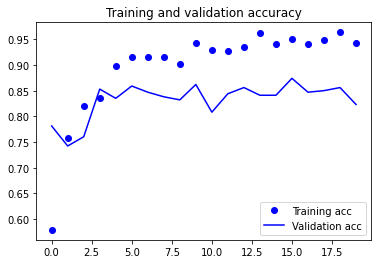

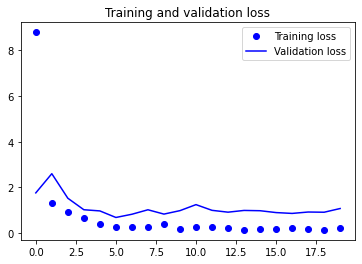

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Manual Test of the model 2 on 4 random pictures from google

In [38]:
# To get the keys we print it and later save it in list
print(test_gen.class_indices.keys())

dict_keys(['Fruit Piercing Moth', 'Gall Flies', 'Locust', 'Stem Borer'])


In [39]:
#Get list of pics in Testfolder in Drive
manual_val_pics = os.listdir(f'/content/drive/MyDrive/PestsTest') #Contains Pics downloaded from google

In [40]:
#Load pics saved in google drive for testing purposes and converting them to tensors
pics=[]
ans = []
for pic in manual_val_pics:
  path = '/content/drive/MyDrive/PestsTest/' + pic
  # print(path)
  pics.append(tf.keras.preprocessing.image.load_img(
    path, color_mode="rgb", target_size=(200, 200), interpolation="nearest"))
  ans.append(pic)

In [41]:
# Rescale images
pic_arrays=[]
for pic in pics:
  pic_arrays.append((tf.keras.preprocessing.image.img_to_array(pic, data_format=None, dtype=None)/255))

In [42]:
#Generate predictions by the model
predictions=[]
for pic in pic_arrays:
  img = np.expand_dims(pic, axis=0)
  predictions.append(model.predict(img))

In [43]:
predictions

[array([[7.6655922e-03, 1.0000000e+00, 3.7484028e-04, 9.9999464e-01]],
       dtype=float32),
 array([[0.00275563, 0.25241375, 1.        , 0.9454291 ]], dtype=float32),
 array([[0.9999629 , 0.81567   , 0.21308352, 0.8961669 ]], dtype=float32),
 array([[1.0036937e-03, 7.0767134e-01, 1.8194991e-06, 9.9998665e-01]],
       dtype=float32),
 array([[1.9857650e-04, 2.6828554e-04, 1.0000000e+00, 1.7659977e-02]],
       dtype=float32),
 array([[3.2939031e-04, 3.0706960e-01, 1.4521513e-05, 9.9996459e-01]],
       dtype=float32),
 array([[0.9994499 , 0.40662166, 0.31082132, 0.6416888 ]], dtype=float32),
 array([[0.00421946, 0.9999802 , 0.00219553, 0.9999031 ]], dtype=float32)]

In [44]:
# As per the predictions obtaning what category they should belong to and converting it to text
#compare results to to the file name
key = ['Fruit Piercing Moth', 'Gall Flies', 'Locust', 'Stem Borer']
for i in range(4):
  print(key[np.argmax(predictions[i][0])] + ' should be ' + ans[i].split('.')[0])

Gall Flies should be GallFly
Locust should be Locust
Fruit Piercing Moth should be FruitPiercingMoth
Stem Borer should be StemBorer
